#### Importing necessary Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

#### Importing the dataset and storing it as a dataframe:

In [2]:
os.chdir("D:\\Data Science\\Machine Leaning\\Projects\\Wine Quality Prediction")
os.getcwd()

'D:\\Data Science\\Machine Leaning\\Projects\\Wine Quality Prediction'

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Displaying basic information about the dataset:

In [4]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("Shape of dataset:",df.shape)

Number of rows: 1599
Number of columns: 12
Shape of dataset: (1599, 12)


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Checking if there are any missing values:

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset.

#### Performing initial analysis on data:

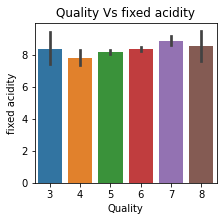

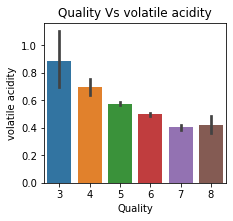

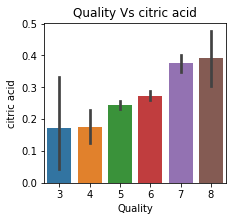

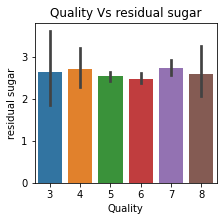

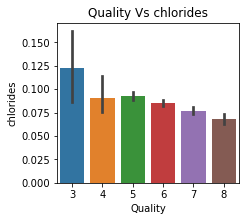

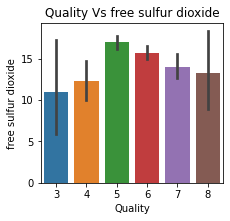

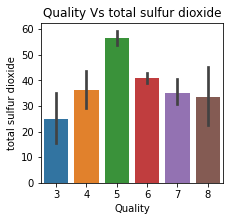

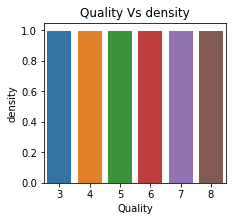

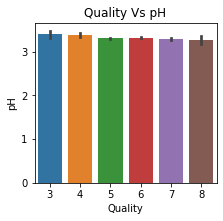

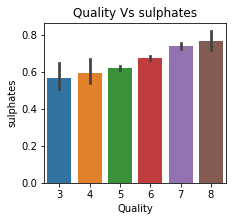

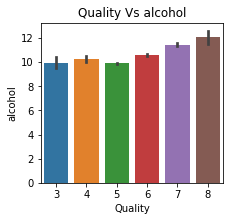

In [9]:
for feature in df.columns:
    if feature != 'quality':
        fig = plt.figure(figsize=(15,10))
        i=1
        plt.subplot(3,4,i)
        sns.barplot(x='quality',y=feature,data=df)
        plt.xlabel('Quality')
        plt.ylabel(feature)
        plt.title('Quality Vs {}'.format(feature))
        plt.show() 
        i=i+1

From the plots below we can infer:
1. Quality is high when volatile acidity is less.
2. Quality is high when citric acid is high.
3. Quality is high when chlorides are less.
4. Quality is high when sulphates are more.
5. Quality is high when alcohol is more.

In [10]:
#Counting the number of instances of each class

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

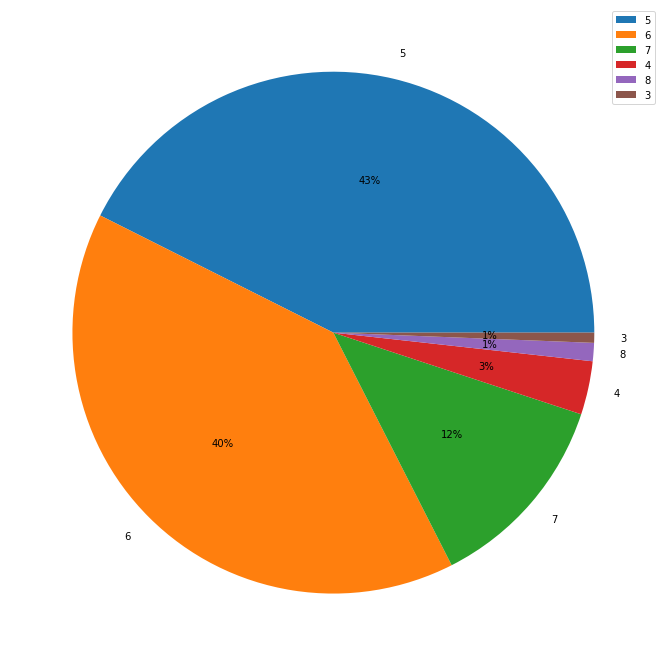

In [11]:
fig = plt.figure(figsize=(12,12))
plt.pie(x=df['quality'].value_counts(), labels = df['quality'].unique(),data=df,autopct='%.0f%%')
plt.legend()
plt.show()

We can see that we have 6 classes of quality that are 3,4,5,6,7,8 but we don’t want it like this. So what we will do is we will mark every rating from 3 to 6 as BAD and ratings of 7 and 8 as GOOD.

In [12]:
df1=df.copy()

In [13]:
ranges = (2,6.5,8) 
groups = ['bad','good']
df1['quality'] = pd.cut(df1['quality'],bins=ranges,labels=groups)

Here we are cutting bins use pd.cut() in 2 categories 2-6.5 as BAD and 6.5-8 as GOOD.

In [14]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


#### Alloting 0 to bad and 1 to good:

In [15]:
le = LabelEncoder()
df1['quality'] = le.fit_transform(df1['quality'])
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [16]:
#Again checking counts
df1['quality'].value_counts(normalize=True)

0    0.86429
1    0.13571
Name: quality, dtype: float64

We have two classes here, but the dataset is highly imbalanced.

#### Balancing the two classes:

In [17]:
good_quality = df1[df1['quality']==1]
bad_quality = df1[df1['quality']==0]
bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]
new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
315,7.1,0.350,0.29,2.5,0.096,20.0,53.0,0.99620,3.42,0.65,11.0,0
375,11.5,0.540,0.71,4.4,0.124,6.0,15.0,0.99840,3.01,0.83,11.8,1
282,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,0
1123,10.7,0.400,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,0
648,8.7,0.480,0.30,2.8,0.066,10.0,28.0,0.99640,3.33,0.67,11.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,10.0,0.430,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0,0
320,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,1
444,5.3,0.570,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5,1
645,7.8,0.640,0.10,6.0,0.115,5.0,11.0,0.99840,3.37,0.69,10.1,1


In this step, we are simply balancing our dataset.
We are making a new data frame good_quality in which we will have data of just good_quality wine or we can say where the quality is 1.
Similarly, we are making for bad_quality.
Then we are simply shuffling bad quality data using df.sample(frac=1). It means shuffle the data and take a 100% fraction of the data.
Then we are taking out 217 samples of bad_quality because we have just 217 samples of good_quality.
Then we are joining both 217 samples of each class and our final data frame will have 217*2=434 rows.
Finally, again shuffling the data.

In [18]:
#Again checking the counts of classes in new dataframe.
new_df['quality'].value_counts(normalize=True)

0    0.5
1    0.5
Name: quality, dtype: float64

#### Checking correlation between columns:

In [19]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.543605
sulphates               0.339161
citric acid             0.319235
fixed acidity           0.156321
residual sugar          0.111585
pH                     -0.063446
free sulfur dioxide    -0.114056
chlorides              -0.178906
total sulfur dioxide   -0.187985
density                -0.188076
volatile acidity       -0.402099
Name: quality, dtype: float64

#### Splitting the data into Independent(X) and Dependent(Y) and then splitting it into train and test:

In [20]:
X = new_df.drop('quality',axis=1) 
Y = new_df['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [21]:
print("Shape of train data:")
print("Shape of X Train:",X_train.shape)
print("Shape of Y Train:",Y_train.shape)

print("\n\nShape of test data:")
print("Shape of X Test:",X_test.shape)
print("Shape of Y Test:",Y_test.shape)

Shape of train data:
Shape of X Train: (303, 11)
Shape of Y Train: (303,)


Shape of test data:
Shape of X Test: (131, 11)
Shape of Y Test: (131,)


In [22]:
rf=RandomForestClassifier()

In [23]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
grid_rf = GridSearchCV(rf,param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, Y_train)
print('Best parameters --> ', grid_rf.best_params_)

Best parameters -->  {'n_estimators': 700}


In [24]:
rf1=RandomForestClassifier(n_estimators=100)
rf1.fit(X_train,Y_train)

RandomForestClassifier()

In [25]:
# Wine Quality Prediction
pred = grid_rf.predict(X_test)
print('_'*60)

print("*****Confusion Matrix:*****")
print(confusion_matrix(Y_test,pred))
print('_'*60)


print('\n*****Classification Report:*****')
print(classification_report(Y_test,pred))
print('_'*60)


print('\n*****Accuracy Score:*****')
print(accuracy_score(Y_test,pred))
print('_'*60)

____________________________________________________________
*****Confusion Matrix:*****
[[56  8]
 [ 6 61]]
____________________________________________________________

*****Classification Report:*****
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        64
           1       0.88      0.91      0.90        67

    accuracy                           0.89       131
   macro avg       0.89      0.89      0.89       131
weighted avg       0.89      0.89      0.89       131

____________________________________________________________

*****Accuracy Score:*****
0.8931297709923665
____________________________________________________________


The accuracy score is 89%